<a href="https://colab.research.google.com/github/VoXuanLanh/AI_Recognition/blob/main/BT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import albumentations as A
import cv2
import os
import shutil

# Thư mục gốc ảnh và label
img = '/content/drive/MyDrive/Money/train/images'
label = '/content/drive/MyDrive/Money/train/labels'

# Thư mục lưu augment
aug_img = '/content/drive/MyDrive/Money/train/augmented/images'
aug_label = '/content/drive/MyDrive/Money/train/augmented/labels'

# Tạo thư mục nếu chưa có
os.makedirs(aug_img, exist_ok=True)
os.makedirs(aug_label, exist_ok=True)

# Khai báo augmentations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.3),
    A.Rotate(limit=15, p=0.3),
    A.Blur(blur_limit=3, p=0.2),
    A.ColorJitter(p=0.3),
])

# Duyệt qua từng ảnh và augment
for img_name in os.listdir(img):
    if img_name.endswith(('.jpg', '.jpeg', '.png')):
        img_path = os.path.join(img, img_name)
        label_path = os.path.join(label, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        # Đọc ảnh
        image = cv2.imread(img_path)

        # Augment ảnh
        augmented = transform(image=image)
        aug_image = augmented['image']

        # Lưu ảnh augment
        aug_img_name = f'aug_{img_name}'
        aug_img_path = os.path.join(aug_img, aug_img_name)
        cv2.imwrite(aug_img_path, aug_image)

        # Copy file label tương ứng
        if os.path.exists(label_path):
            aug_label_path = os.path.join(aug_label, f'aug_{os.path.basename(label_path)}')
            shutil.copy(label_path, aug_label_path)

print("✅ Done augment toàn bộ ảnh và label!")


✅ Done augment toàn bộ ảnh và label!


In [ ]:
import os
import shutil

# Thư mục gốc train
train_img = '/content/drive/MyDrive/Money/train/images'
train_label = '/content/drive/MyDrive/Money/train/labels'

# Thư mục augment
aug_img = '/content/drive/MyDrive/Money/train/augmented/images'
aug_label = '/content/drive/MyDrive/Money/train/augmented/labels'

# Merge ảnh augment vào train/image
for img_name in os.listdir(aug_img):
    src_path = os.path.join(aug_img, img_name)
    dst_path = os.path.join(train_img, img_name)
    shutil.move(src_path, dst_path)

# Merge label augment vào train/labels
for label_name in os.listdir(aug_label):
    src_path = os.path.join(aug_label, label_name)
    dst_path = os.path.join(train_label, label_name)
    shutil.move(src_path, dst_path)

# Xóa thư mục augment sau khi merge xong (tùy chọn)
shutil.rmtree('/content/drive/MyDrive/Money/train/augmented')

print("✅ Merge ảnh và label augment vào thư mục train thành công!")

✅ Merge ảnh và label augment vào thư mục train thành công!


In [13]:
%cd "/content/drive/MyDrive/Money"
!rm data.yaml
!echo 'train: /content/drive/MyDrive/Money/train/images'>> data.yaml
!echo 'val: /content/drive/MyDrive/Money/val/images'>> data.yaml
!echo 'nc: 13'>> data.yaml
!echo 'names: ['Đậu hủ sốt cà chua','rau luộc','rau xào','gà chiên','thịt kho','canh','cơm','trái cây','củ cải muối','thịt bò xào','trứng chiên','tôm chiên','tôm kho'] '>> data.yaml

/content/drive/MyDrive/Money


In [1]:
pip install ultralytics

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [15]:
model = YOLO("yolov8n.pt")
model.train(data='/content/drive/MyDrive/Money/data.yaml', epochs=10, batch=16, imgsz=640)

Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Money/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pre

train: Scanning /content/drive/MyDrive/Money/train/labels.cache... 264 images, 8 backgrounds, 48 corrupt: 100%|██████████| 272/272 [00:00<?, ?it/s]

train: /content/drive/MyDrive/Money/train/images/30.jpg: ignoring corrupt image/label: Label class 14 exceeds dataset class count 13. Possible class labels are 0-12
train: /content/drive/MyDrive/Money/train/images/31.jpg: ignoring corrupt image/label: Label class 14 exceeds dataset class count 13. Possible class labels are 0-12
train: /content/drive/MyDrive/Money/train/images/33.jpg: ignoring corrupt image/label: Label class 14 exceeds dataset class count 13. Possible class labels are 0-12
train: /content/drive/MyDrive/Money/train/images/34.jpg: ignoring corrupt image/label: Label class 14 exceeds dataset class count 13. Possible class labels are 0-12
train: /content/drive/MyDrive/Money/train/images/81.jpg: ignoring corrupt image/label: Label class 13 exceeds dataset class count 13. Possible class labels are 0-12
train: /content/drive/MyDrive/Money/train/images/82.jpg: ignoring corrupt image/label: Label class 13 exceeds dataset class count 13. Possible class labels are 0-12
train: /co


val: Scanning /content/drive/MyDrive/Money/val/labels.cache... 13 images, 0 backgrounds, 2 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]

val: /content/drive/MyDrive/Money/val/images/10.jpg: ignoring corrupt image/label: Label class 13 exceeds dataset class count 13. Possible class labels are 0-12
val: /content/drive/MyDrive/Money/val/images/11.jpg: ignoring corrupt image/label: Label class 14 exceeds dataset class count 13. Possible class labels are 0-12
Plotting labels to runs/detect/train4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.9297      4.645      1.618         15        640: 100%|██████████| 14/14 [03:24<00:00, 14.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]

                   all         11         11      0.015      0.909      0.299      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.6308      4.051      1.385         15        640: 100%|██████████| 14/14 [03:09<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.82s/it]

                   all         11         11     0.0107          1      0.276      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.6435      3.536      1.378         20        640: 100%|██████████| 14/14 [03:07<00:00, 13.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.71s/it]

                   all         11         11      0.013          1      0.431      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.6372      3.168      1.341         17        640: 100%|██████████| 14/14 [03:10<00:00, 13.62s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.89s/it]

                   all         11         11     0.0129          1      0.339      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.5593      2.853      1.275         19        640: 100%|██████████| 14/14 [02:58<00:00, 12.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.54s/it]

                   all         11         11      0.743     0.0909      0.372       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.5511      2.672      1.279         16        640: 100%|██████████| 14/14 [03:01<00:00, 12.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.74s/it]

                   all         11         11      0.528      0.176      0.427       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.5401      2.525       1.22         19        640: 100%|██████████| 14/14 [03:10<00:00, 13.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]

                   all         11         11      0.378      0.273      0.372      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G      0.545      2.368      1.252         18        640: 100%|██████████| 14/14 [03:09<00:00, 13.51s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.76s/it]

                   all         11         11      0.355      0.445      0.477      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.4938      2.225      1.207         15        640: 100%|██████████| 14/14 [03:08<00:00, 13.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.91s/it]

                   all         11         11      0.457      0.455      0.497      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.4668      2.115      1.164         16        640: 100%|██████████| 14/14 [03:08<00:00, 13.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.94s/it]

                   all         11         11      0.657      0.364      0.518      0.448



10 epochs completed in 0.533 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.80s/it]


                   all         11         11      0.657      0.364      0.518      0.448
    Đậu hủ sốt cà chua          1          1       0.84          1      0.995      0.995
              rau luộc          1          1          1          0     0.0711     0.0569
               rau xào          1          1          0          0      0.249      0.224
              gà chiên          1          1      0.804          1      0.995      0.995
              thịt kho          1          1          1          0      0.142     0.0995
                  canh          1          1          1          0      0.995      0.697
                   cơm          1          1      0.234          1      0.497      0.448
              trái cây          1          1      0.348          1      0.497      0.182
           củ cải muối          1          1          1          0     0.0163     0.0111
           thịt bò xào          1          1          0          0      0.249      0.224
             tôm chiê

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7dca470f0710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.74M/6.74M [00:00<00:00, 71.5MB/s]



image 1/1 /content/drive/MyDrive/Money/test/test.jpg: 448x640 4 bowls, 1243.6ms
Speed: 25.4ms preprocess, 1243.6ms inference, 107.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict


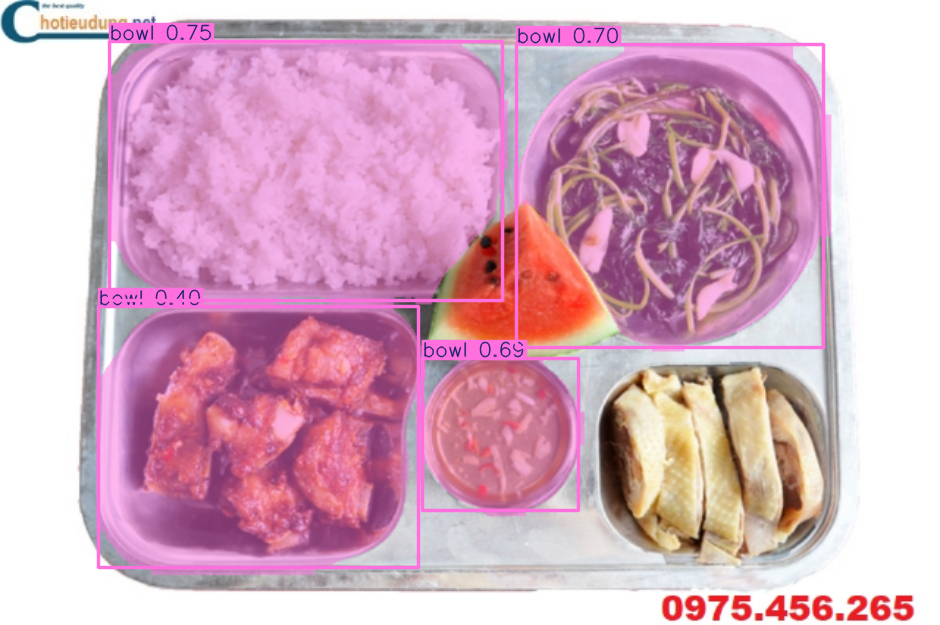

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
# Load model đã train xong
model = YOLO('yolov8n-seg.pt')

# Test thử 1 ảnh
results = model(source='/content/drive/MyDrive/Money/test/test.jpg', save=True, save_crop=True, imgsz=640, conf=0.35)
img = cv2.imread('/content/drive/MyDrive/Money/test/test.jpg')
results[0].show()



image 1/1 /content/drive/MyDrive/Money/test/test2.jpg: 480x640 1 cơm, 181.5ms
Speed: 10.6ms preprocess, 181.5ms inference, 6.4ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


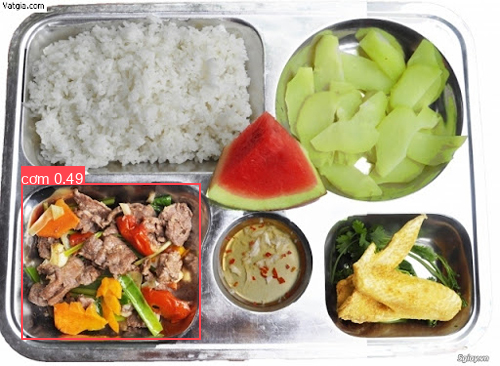

In [18]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
model = YOLO('/content/drive/MyDrive/Money/runs/detect/train4/weights/best.pt')

results = model.predict(source='/content/drive/MyDrive/Money/test/test2.jpg', save=True, save_crop=True, imgsz=640)
img = cv2.imread('/content/drive/MyDrive/Money/test/test2.jpg')
results[0].show()



image 1/1 /content/drive/MyDrive/Money/test/test3.jpg: 512x640 4 bowls, 380.3ms
Speed: 4.3ms preprocess, 380.3ms inference, 23.7ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/segment/predict2


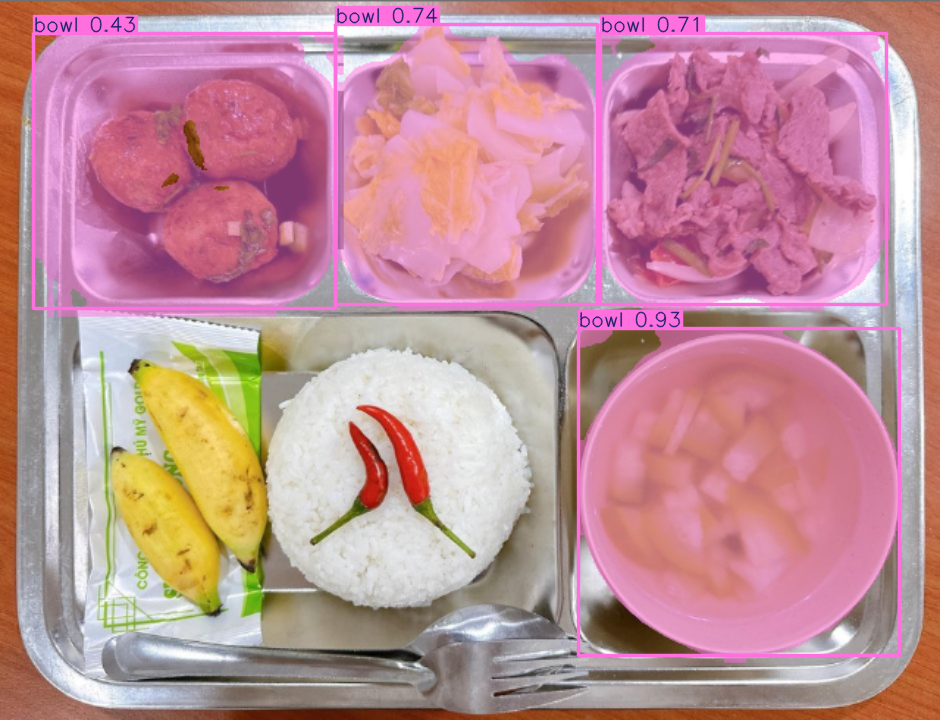

In [3]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
model = YOLO('yolov8n-seg.pt')

results = model(source='/content/drive/MyDrive/Money/test/test3.jpg', save=True, save_crop=True, imgsz=640, conf=0.35)
img = cv2.imread('/content/drive/MyDrive/Money/test/test3.jpg')
results[0].show()


100%|██████████| 22.2M/22.2M [00:00<00:00, 105MB/s]

image 1/1 /content/drive/MyDrive/Money/test/test4.jpg: 480x640 1 cơm, 197.1ms
Speed: 4.7ms preprocess, 197.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


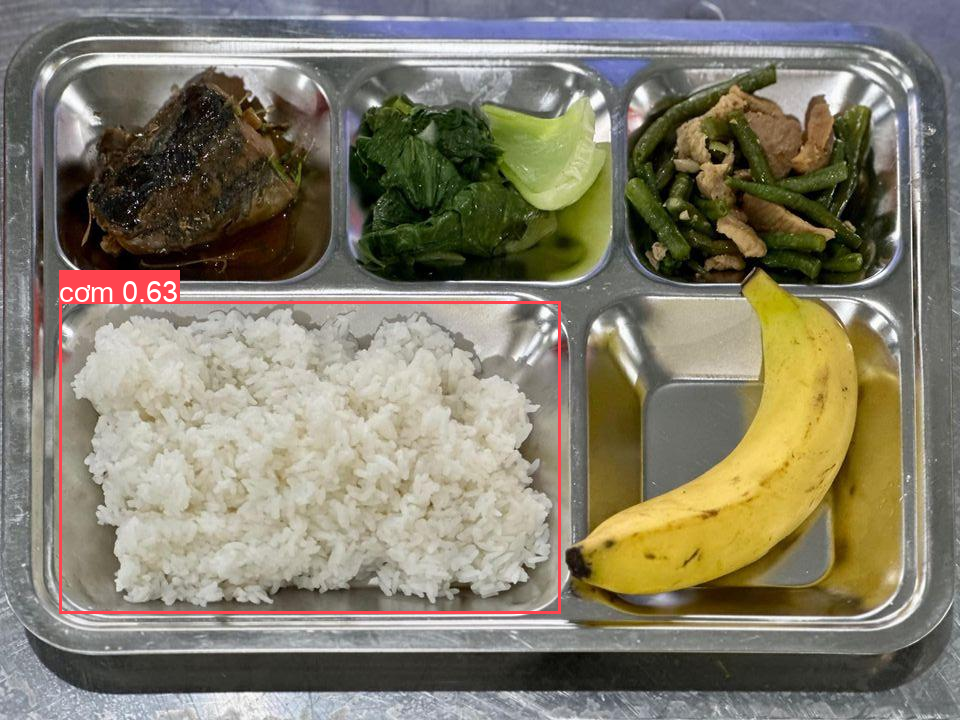

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
model = YOLO('/content/drive/MyDrive/Money/runs/detect/train4/weights/best.pt')

results = model.predict(source='/content/drive/MyDrive/Money/test/test4.jpg', save=True, save_crop=True, imgsz=640)
img = cv2.imread('/content/drive/MyDrive/Money/test/test4.jpg')
results[0].show()



image 1/1 /content/drive/MyDrive/Money/test/test5.jpg: 480x640 2 rau luộcs, 1 thịt kho, 1 củ cải muối, 7.1ms
Speed: 2.2ms preprocess, 7.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict5


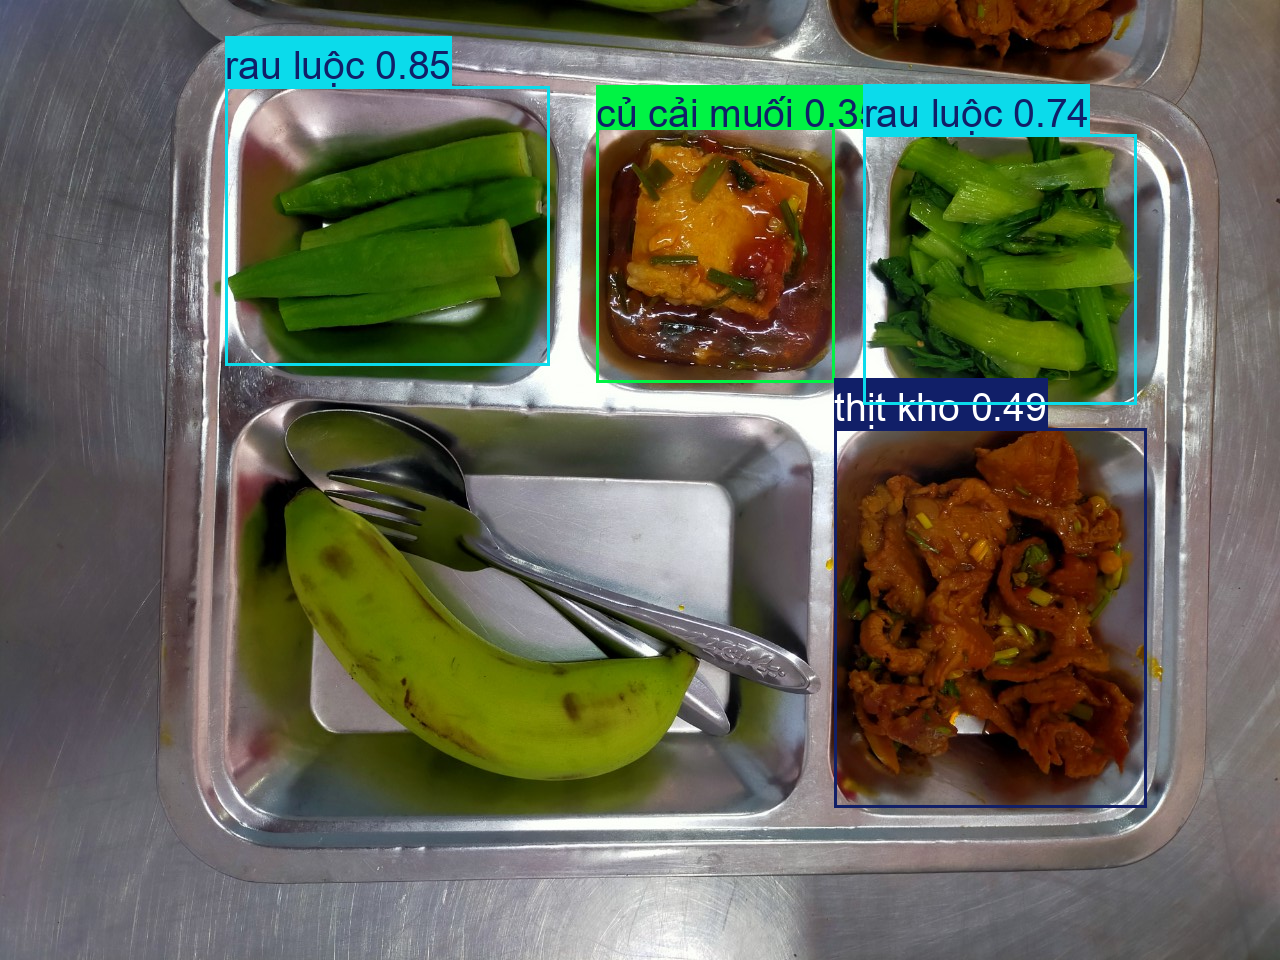

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
# Load model đã train xong
model = YOLO('/content/drive/MyDrive/Money/runs/detect/train/weights/best.pt')

# Test thử 1 ảnh
results = model.predict(source='/content/drive/MyDrive/Money/test/test5.jpg', save=True, save_crop=True, imgsz=640)
img = cv2.imread('/content/drive/MyDrive/Money/test/test5.jpg')
results[0].show()



image 1/1 /content/drive/MyDrive/Money/test/test6.jpg: 480x640 (no detections), 288.4ms
Speed: 4.9ms preprocess, 288.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict2


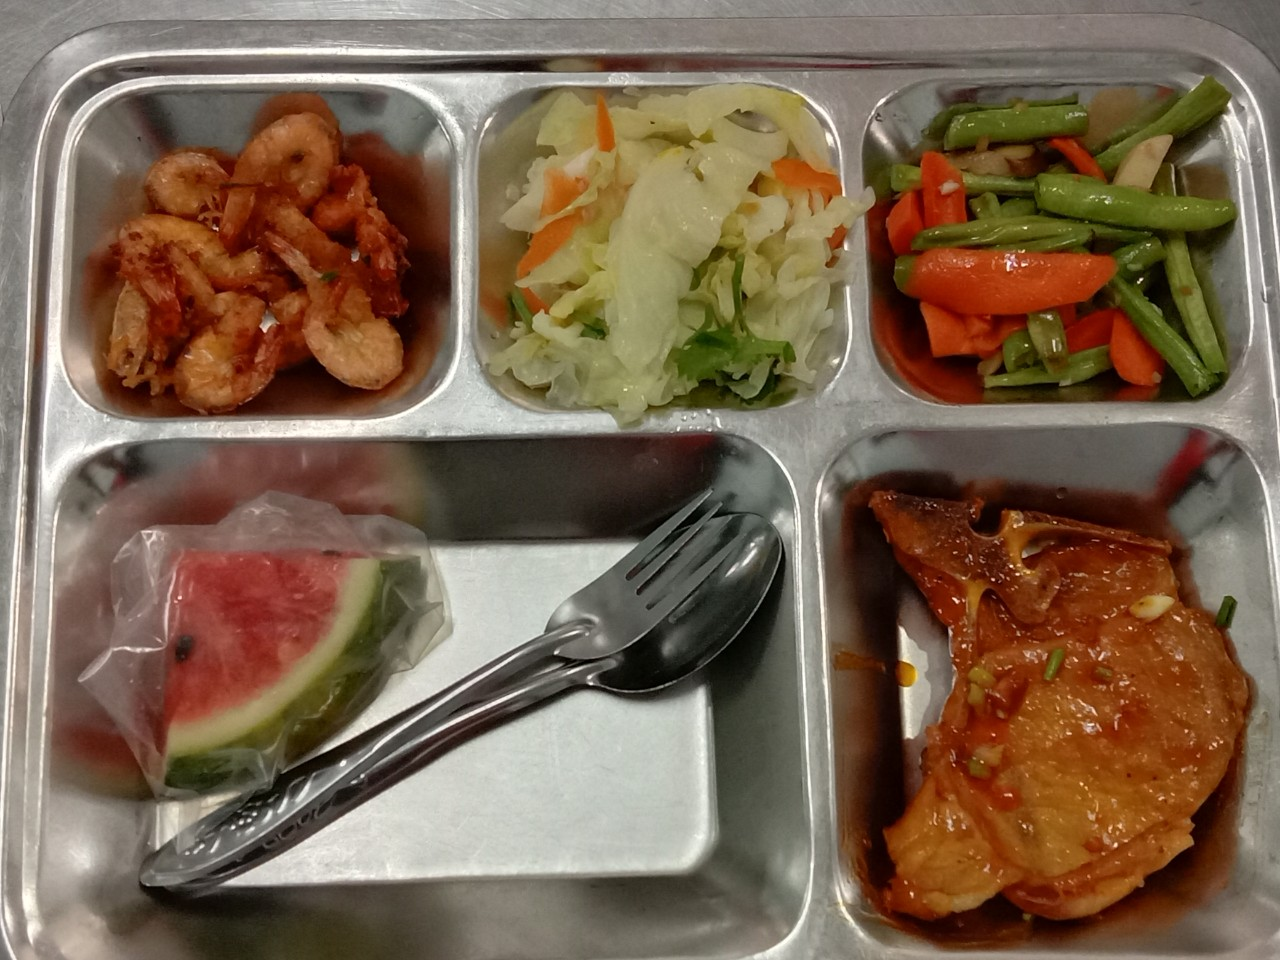

In [12]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
# Load model đã train xong
model = YOLO('/content/drive/MyDrive/Money/runs/detect/train4/weights/best.pt')

# Test thử 1 ảnh
results = model.predict(source='/content/drive/MyDrive/Money/test/test6.jpg', save=True, save_crop=True, imgsz=640)
img = cv2.imread('/content/drive/MyDrive/Money/test/test6.jpg')
results[0].show()


In [8]:
mapping_dict = {
    0: 'Đậu hủ sốt cà chua',
    1: 'rau luộc',
    2: 'rau xào',
    3: 'gà chiên',
    4: 'thịt kho',
    5: 'canh',
    6: 'cơm',
    7: 'trái cây',
    8: 'củ cải muối',
    9: 'thịt bò xào',
    11: 'trứng chiên',
    13: 'tôm chiên',
    14: 'tôm kho',
}


In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image
import os

def load_dataset(image_folder, label_folder, img_size=(64,64)):
    X = []
    y = []
    for img_name in os.listdir(image_folder):
        if img_name.endswith('.jpg'):
            # Load ảnh
            img_path = os.path.join(image_folder, img_name)
            img = image.load_img(img_path, target_size=img_size)
            img_array = image.img_to_array(img) / 255.0
            X.append(img_array)

            # Load label
            label_path = os.path.join(label_folder, img_name.replace('.jpg', '.txt'))
            with open(label_path, 'r') as f:
                class_id = int(f.readline().split()[0])  # Lấy số đầu tiên
                y.append(class_id)

    X = np.array(X)
    y = np.array(y)
    return X, y


In [10]:
train_image_folder = '/content/drive/MyDrive/Money/train/images'
train_label_folder = '/content/drive/MyDrive/Money/train/labels'

val_image_folder = '/content/drive/MyDrive/Money/val/images'
val_label_folder = '/content/drive/MyDrive/Money/val/labels'

X_train, y_train = load_dataset(train_image_folder, train_label_folder)
X_val, y_val = load_dataset(val_image_folder, val_label_folder)


In [11]:
from tensorflow.keras.utils import to_categorical
import numpy as np
num_classes = np.max(y_train) + 1

y_train_cat = to_categorical(y_train, num_classes)
y_val_cat = to_categorical(y_val, num_classes)


In [9]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(64, 64, 3)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.BatchNormalization(), #
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')

])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=10,
    batch_size=16,
)


Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 184ms/step - accuracy: 0.1379 - loss: 9.6839 - val_accuracy: 0.0769 - val_loss: 2.6385
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 222ms/step - accuracy: 0.4374 - loss: 2.3168 - val_accuracy: 0.0769 - val_loss: 4.1719
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.4592 - loss: 1.7764 - val_accuracy: 0.0769 - val_loss: 7.2507
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.4556 - loss: 1.5168 - val_accuracy: 0.0000e+00 - val_loss: 9.8355
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - accuracy: 0.5376 - loss: 1.5836 - val_accuracy: 0.0769 - val_loss: 11.4834
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.6229 - loss: 0.9843 - val_accuracy: 0.0769 - val_loss: 13.4925
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.6274 - loss: 1.0771 - val_accuracy: 0.0769 - val_loss: 14.7733
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.7568 - loss: 0.8035 - val_accur

In [10]:
model.save('/content/drive/MyDrive/Money/cnn_model.keras')

In [11]:
import json

menu = {
    "Đậu hủ sốt cà chua": 10000,
  "rau luộc": 5000,
  "rau xào": 7000,
  "gà chiên": 10000,
  "thịt kho": 10000,
  "canh": 7000,
  "cơm": 3000,
  "trái cây": 5000,
  "củ cải muối": 3000,
  "thịt bò xào": 15000,
  "trứng xào": 8000,
  "trứng chiên": 5000,
  "cá kho": 12000,
  "tôm chiên": 12000,
  "tôm kho": 12000,
  "thịt luộc": 10000,
  "cá chiên": 12000
}

with open('/content/drive/MyDrive/Money/menu.json', 'w') as f:
    json.dump(menu, f)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step


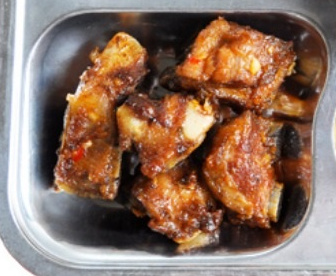

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


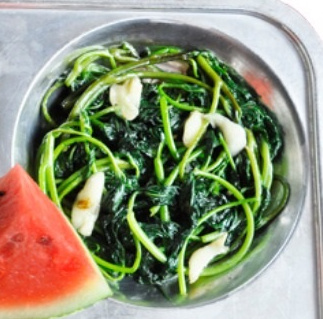

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


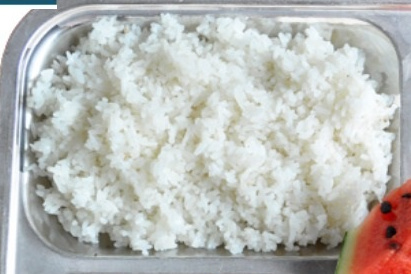

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


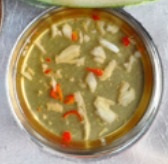


👉 Tổng cộng: 43,000 VND


In [14]:
import json
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from IPython.display import Image as IPyImage, display, HTML

cnn_model = load_model('/content/drive/MyDrive/Money/cnn_model.keras')

classes = ['Đậu hủ sốt cà chua', 'rau luộc', 'rau xào', 'gà chiên', 'thịt kho',
           'canh', 'cơm', 'trái cây', 'củ cải muối', 'thịt bò xào', 'trứng xào',
           'trứng chiên', 'cá kho', 'tôm chiên', 'tôm kho', 'thịt luộc', 'cá chiên']

# Dự đoán tên món ăn
predicted_dishes = []
crop_dir = '/content/runs/segment/predict/crops'

with open('/content/drive/MyDrive/Money/menu.json', 'r') as f:
    menu = json.load(f)
total = 0
for dish_folder in os.listdir(crop_dir):
    folder_path = os.path.join(crop_dir, dish_folder)
    if not os.path.isdir(folder_path):
        continue

    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)

        # Load ảnh và dự đoán
        img = image.load_img(img_path, target_size=(64, 64))
        img_array = image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = cnn_model.predict(img_array)
        class_idx = np.argmax(prediction)
        dish_name = classes[class_idx]
        predicted_dishes.append(dish_name)

        price = menu.get(dish_name, 0)
        total += price

        display(IPyImage(img_path, width=150))
        display(HTML(f"<p><b>{dish_name}</b>: {price:,} VND</p>"))

print(f"\n👉 Tổng cộng: {total:,} VND")
print("===================")